In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib_venn import venn2, venn3

In [2]:
mouse = pd.read_csv('../data/Yamuna/Mouse_NT_vs_ABCD1_DESeq2_results.tsv', sep='\t', header=None, names=["gene","Base mean","log2FC","StdErr","Wald_Stats","p","q"])
human = pd.read_csv('../data/Yamuna/Human_NT_vs_ABCD1_DESeq2_results.tsv', sep='\t', header=None, names=["gene","Base mean","log2FC","StdErr","Wald_Stats","p","q"])

mouse['log2FC'] = mouse.loc[:,'log2FC'] * -1
human['log2FC'] = human.loc[:,'log2FC'] * -1

mouse.head()

,gene,Base mean,log2FC,StdErr,Wald_Stats,p,q
0,Timp2,6898.429574,3.955563,0.096145,-41.141552,0.000000e+00,0.000000e+00
1,Tmbim6,6188.554131,1.990989,0.063462,-31.372878,4.744136e-216,4.415842e-212
2,Cdc34,1881.032867,-2.176991,0.075121,28.979662,1.187292e-184,7.367543e-181
3,Lipa,3256.752104,2.064111,0.072635,-28.417525,1.228353e-177,5.716754e-174
4,Selp,3124.381122,-2.682026,0.102079,26.273974,3.804801e-152,1.416603e-148


In [3]:
print(len(mouse), len(human))

mouse_de = mouse[(mouse.q < 0.01) & (abs(mouse.log2FC) > 1)]
human_de = human[(human.q < 0.01) & (abs(human.log2FC) > 1)]

print(len(mouse_de), len(human_de))

53656 56832
1031 2600


In [4]:
mouse_de.loc[:, 'gene'] = mouse_de.gene.str.upper()
mouse_de.head()

/Users/alex/Documents/abcd1/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,gene,Base mean,log2FC,StdErr,Wald_Stats,p,q
0,TIMP2,6898.429574,3.955563,0.096145,-41.141552,0.000000e+00,0.000000e+00
1,TMBIM6,6188.554131,1.990989,0.063462,-31.372878,4.744136e-216,4.415842e-212
2,CDC34,1881.032867,-2.176991,0.075121,28.979662,1.187292e-184,7.367543e-181
3,LIPA,3256.752104,2.064111,0.072635,-28.417525,1.228353e-177,5.716754e-174
4,SELP,3124.381122,-2.682026,0.102079,26.273974,3.804801e-152,1.416603e-148


In [5]:
len(set(mouse_de.gene) & set(human_de.gene))

194

In [6]:
len(set(mouse_de.gene) - set(human_de.gene)), len(set(human_de.gene) - set(mouse_de.gene))

(837, 2406)

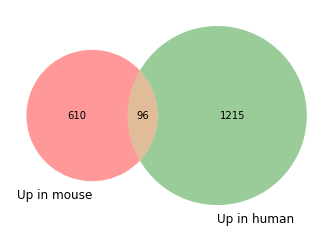

In [7]:
venn2([set(mouse_de[mouse_de.log2FC > 0].gene), set(human_de[human_de.log2FC > 0].gene)], ['Up in mouse', 'Up in human'])


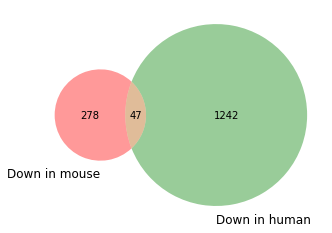

In [8]:
venn2([set(mouse_de[mouse_de.log2FC < 0].gene), set(human_de[human_de.log2FC < 0].gene)], ['Down in mouse', 'Down in human'])


In [9]:
print('Maximum possible overlap:', round(len(set(mouse_de.gene) & set(human.gene)) / len(set(mouse_de.gene))*100,2), '%')

Maximum possible overlap: 77.69 %


In [10]:
Up_in_both_mouse_and_human = set(mouse_de[mouse_de.log2FC > 0].gene) & set(human_de[human_de.log2FC > 0].gene)
Up_only_in_mouse = set(mouse_de[mouse_de.log2FC > 0].gene) - set(human_de[human_de.log2FC > 0].gene)
Up_only_in_human = set(human_de[human_de.log2FC > 0].gene) - set(mouse_de[mouse_de.log2FC > 0].gene)
Down_in_both_mouse_and_human = set(mouse_de[mouse_de.log2FC < 0].gene) & set(human_de[human_de.log2FC < 0].gene)
Down_only_in_mouse = set(mouse_de[mouse_de.log2FC < 0].gene) - set(human_de[human_de.log2FC < 0].gene)
Down_only_in_human = set(human_de[human_de.log2FC < 0].gene) - set(mouse_de[mouse_de.log2FC < 0].gene)
